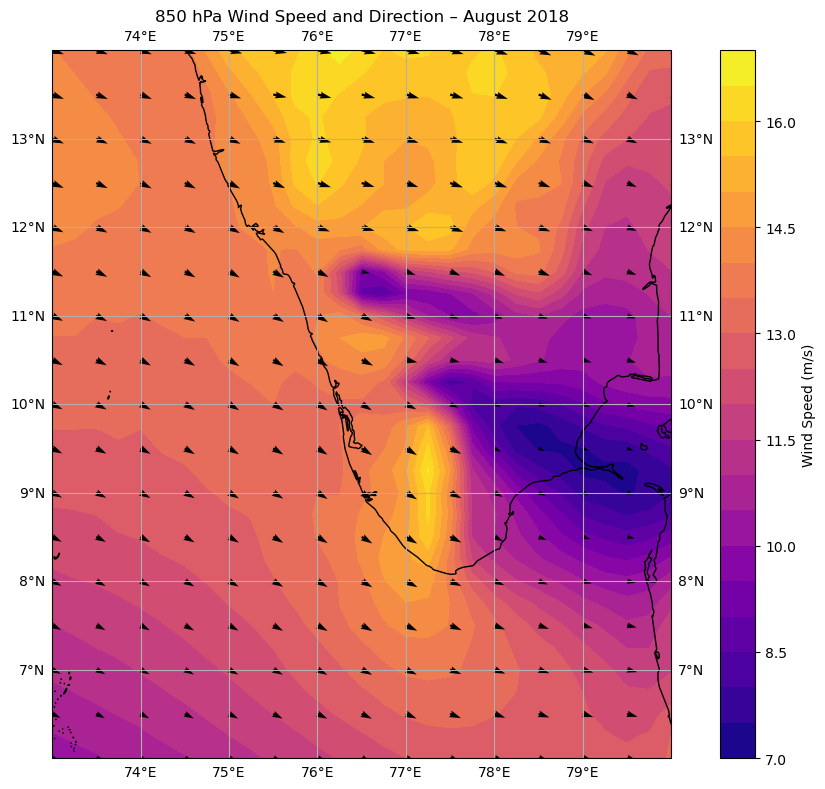

In [40]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load datasets
u_ds = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\rainfall analysis\U_component_of_wind.nc")
v_ds = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\rainfall analysis\V_component_of_wind.nc")

# Use 800 hPa level (since 850 is not available)
u_800 = u_ds['u'].sel(pressure_level=800, latitude=slice(14, 6), longitude=slice(73, 80))
v_800 = v_ds['v'].sel(pressure_level=800, latitude=slice(14, 6), longitude=slice(73, 80))

# Monthly mean for August 2018
u_mean = u_800.mean(dim='valid_time')
v_mean = v_800.mean(dim='valid_time')

# Create wind speed for color shading
wind_speed = (u_mean**2 + v_mean**2)**0.5

# Plot
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([73, 80, 6, 14])
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True)

# Plot wind speed as background color
cf = ax.contourf(u_mean.longitude, u_mean.latitude, wind_speed, 20, cmap='plasma', transform=ccrs.PlateCarree())
plt.colorbar(cf, ax=ax, label='Wind Speed (m/s)')

# Overlay wind vectors
ax.quiver(u_mean.longitude[::2], u_mean.latitude[::2], 
          u_mean[::2, ::2], v_mean[::2, ::2],
          scale=700, transform=ccrs.PlateCarree(), color='black')

plt.title('850 hPa Wind Speed and Direction – August 2018')
plt.tight_layout()
plt.show()


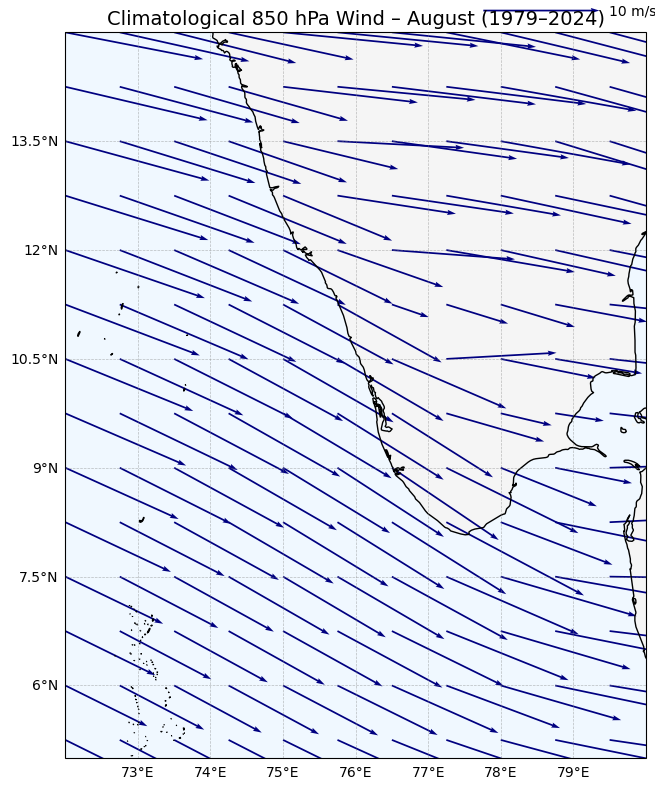

In [25]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Setup
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([72, 80, 5, 15], crs=ccrs.PlateCarree())

# Add clean base map
ax.add_feature(cfeature.LAND, facecolor='whitesmoke')
ax.add_feature(cfeature.OCEAN, facecolor='aliceblue')
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

# Gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Reduce arrow density by slicing
skip = (slice(None, None, 3), slice(None, None, 3))

# Plot quiver
q = ax.quiver(
    u_clim['longitude'][skip[1]], u_clim['latitude'][skip[0]],
    u_clim.values[skip], v_clim.values[skip],
    scale=50, width=0.003, color='navy',
    transform=ccrs.PlateCarree()
)

# Add a quiver key
ax.quiverkey(q, 0.92, 1.03, 10, '10 m/s', labelpos='E', coordinates='axes', fontproperties={'size': 10})

# Title
plt.title("Climatological 850 hPa Wind – August (1979–2024)", fontsize=14)

plt.tight_layout()
plt.show()


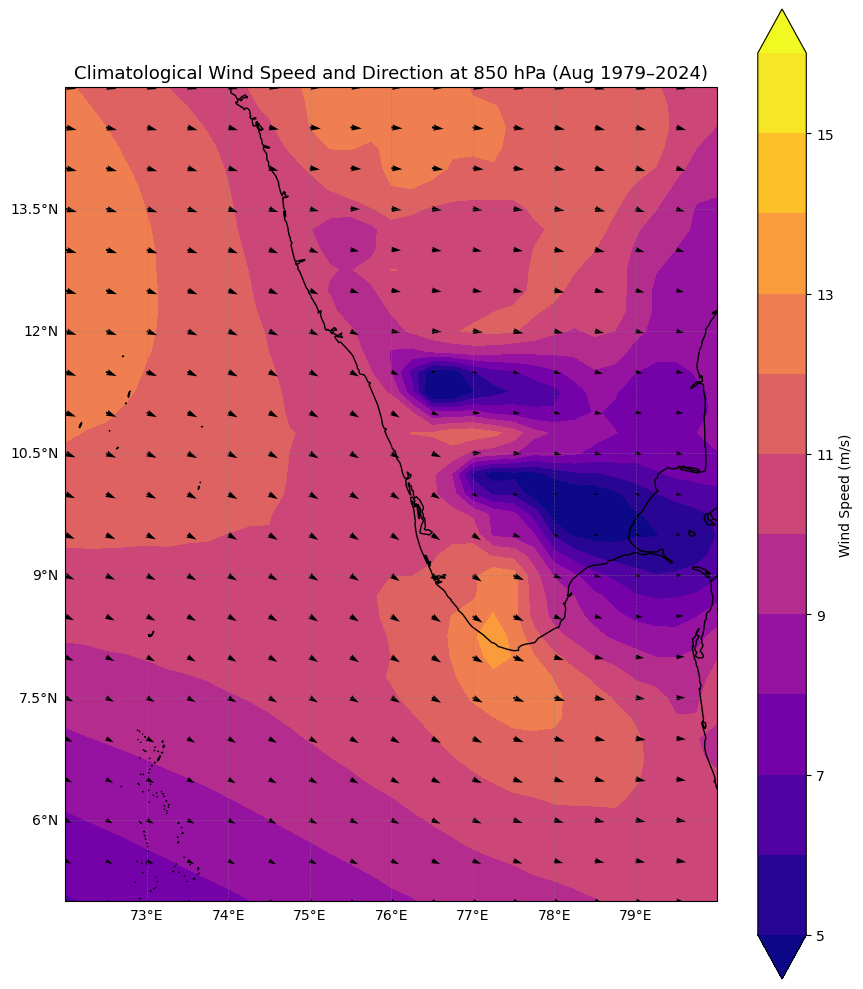

In [38]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load climatological wind components
u_ds = xr.open_dataset("C:/Users/SANGETHA/Downloads/THESIS/rainfall analysis/U_wind_1979_2024.nc")
v_ds = xr.open_dataset("C:/Users/SANGETHA/Downloads/THESIS/rainfall analysis/V_wind_1979_2024.nc")

# Select 850 hPa level and Kerala region
u = u_ds['u'].sel(pressure_level=850, latitude=slice(15, 5), longitude=slice(72, 80))
v = v_ds['v'].sel(pressure_level=850, latitude=slice(15, 5), longitude=slice(72, 80))

# Take August climatology mean
u_mean = u.sel(valid_time=slice("1979-08-01", "2024-08-31")).mean(dim='valid_time')
v_mean = v.sel(valid_time=slice("1979-08-01", "2024-08-31")).mean(dim='valid_time')

# Compute wind speed
wind_speed = np.sqrt(u_mean**2 + v_mean**2)

# Create plot
fig, ax = plt.subplots(figsize=(9, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Filled contour for wind speed
c = ax.contourf(wind_speed.longitude, wind_speed.latitude, wind_speed,
  levels=np.arange(5, 17, 1), cmap='plasma', extend='both')


# Add wind barbs
ax.quiver(u_mean.longitude[::2], u_mean.latitude[::2],
          u_mean[::2, ::2], v_mean[::2, ::2], scale=700, color='black')

# Map features
ax.coastlines('10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([72, 80, 5, 15], crs=ccrs.PlateCarree())

# ✅ Add gridlines with coordinates
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

# Colorbar
cb = fig.colorbar(c, ax=ax, orientation='vertical', label='Wind Speed (m/s)')
ax.set_title("Climatological Wind Speed and Direction at 850 hPa (Aug 1979–2024)", fontsize=13)

plt.tight_layout()
plt.show()



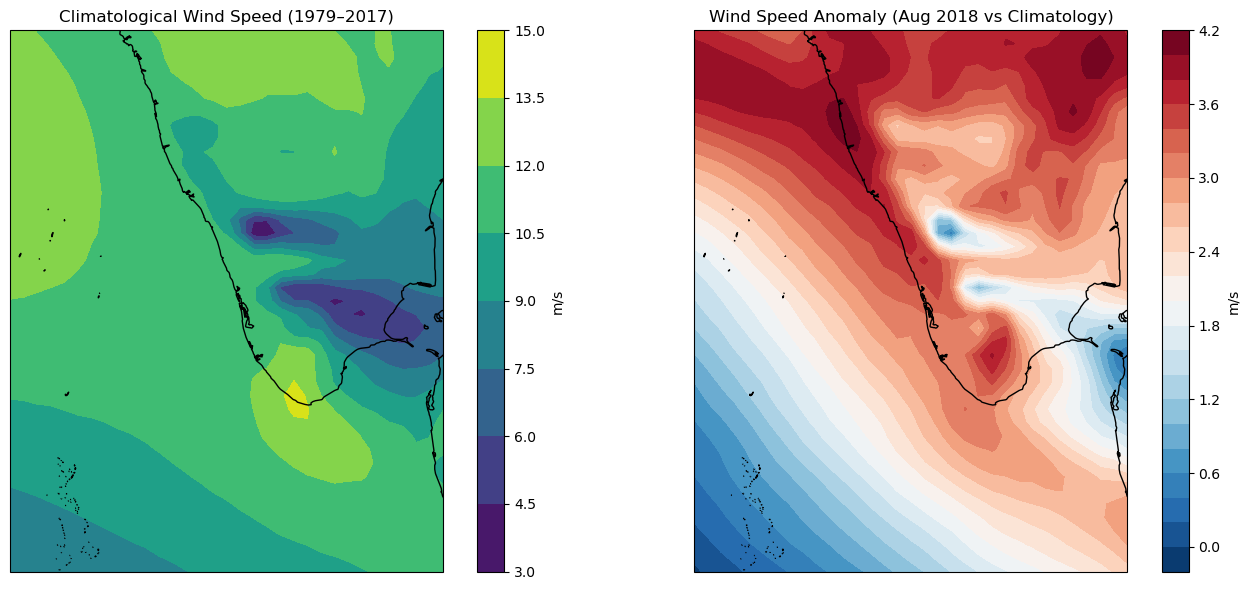

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

u_ds = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\rainfall analysis\U_wind_1979_2024.nc")['u']
v_ds = xr.open_dataset(r"C:\Users\SANGETHA\Downloads\THESIS\rainfall analysis\V_wind_1979_2024.nc")['v']

# === Subset for 850 hPa over Kerala-like region ===
u_850 = u_ds.sel(pressure_level=850, latitude=slice(15, 5), longitude=slice(72, 80))
v_850 = v_ds.sel(pressure_level=850, latitude=slice(15, 5), longitude=slice(72, 80))

# === Compute wind speed ===
wind_speed = np.sqrt(u_850**2 + v_850**2)

# === Climatology: 1979–2017 August ===
clim = wind_speed.sel(valid_time=slice("1979-08-01", "2017-08-31")).mean(dim='valid_time')

# === 2018 August mean ===
w_2018 = wind_speed.sel(valid_time=slice("2018-08-01", "2018-08-31")).mean(dim='valid_time')

# === Anomaly ===
anomaly = w_2018 - clim

# === Plotting ===
fig, axes = plt.subplots(ncols=2, figsize=(14, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Colormap
cmap = 'RdBu_r'  # IPCC style

# Plot 1: Climatology
cs1 = axes[0].contourf(clim.longitude, clim.latitude, clim, transform=ccrs.PlateCarree(), cmap='viridis')
axes[0].add_feature(cfeature.COASTLINE)
axes[0].add_feature(cfeature.BORDERS, linestyle=':')
axes[0].set_title("Climatological Wind Speed (1979–2017)")
plt.colorbar(cs1, ax=axes[0], orientation='vertical', label='m/s')

# Plot 2: Anomaly
cs2 = axes[1].contourf(anomaly.longitude, anomaly.latitude, anomaly, transform=ccrs.PlateCarree(), cmap=cmap, levels=20)
axes[1].add_feature(cfeature.COASTLINE)
axes[1].add_feature(cfeature.BORDERS, linestyle=':')
axes[1].set_title("Wind Speed Anomaly (Aug 2018 vs Climatology)")
plt.colorbar(cs2, ax=axes[1], orientation='vertical', label='m/s')

plt.tight_layout()
plt.show()

